### Question 3

A geyser is a hot spring characterized by an intermittent discharge of water and steam. Old Faithful is a famous cone geyser in Yellowstone National Park, Wyoming. It has a predictable geothermal discharge and since 2000 it has erupted every 44 to 125 minutes. Refer to the addendum data file that contains waiting times and the durations for 272 eruptions. Compute a 95% statistical confidence interval for the mean waiting time using data from only the first 15 eruptions. Compare this to a 95% bootstrap confidence interval using the same 15 data samples. Repeat these calculations using all the data samples. Comment on the relative width of the confidence intervals when using only 15 samples vs using all samples.

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import math
import random

In [199]:
f = open('faithful.dat.txt', "r")
lines = f.readlines()[25:]

In [200]:
df = pd.DataFrame(lines)
df.replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
df.columns = df.iloc[0]
#print(df.columns)
df = df.reindex(df.index.drop(0)).reset_index(drop=True)
df = df[' eruptions waiting '].str.split(' ', 1, expand=True)
df= df.drop(df.columns[0], axis=1)
df = df.rename(columns={1: "Waiting"})
df = df['Waiting'].str.split(' ', 1, expand=True)
df = df.rename(columns={0:"Eruptions", 1: "Waiting"})
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# convert column "a" of a DataFrame
df["Waiting"] = pd.to_numeric(df["Waiting"])

In [201]:
samples_15 = df[0:15]

The upper bound for 15 samples is  79.02553683853083
The lower bound for 15 samples is  62.841129828135855
The interval width is  16.18440701039497


Text(0.5, 1.0, 'Plot of the Upper and Lower Bounds and 100 Sample Means')

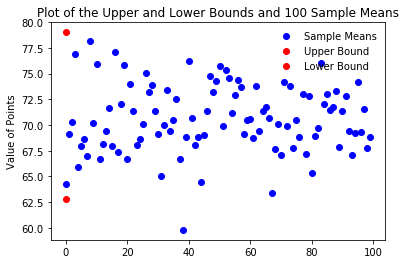

In [270]:
waiting_samples_15 = samples_15.iloc[:,1].values

waiting_mean_15 = np.mean(waiting_samples_15)
waiting_std_dev_15 = np.std(waiting_samples_15)

#print(waiting_std_dev_15)
#print(waiting_mean_15)

confidence_upper = waiting_mean_15 + stats.t.ppf(1-0.025, df = 14) * waiting_std_dev_15 / math.sqrt(15)
confidence_lower = waiting_mean_15 - stats.t.ppf(1-0.025, df = 14) * waiting_std_dev_15 / math.sqrt(15)
confidence_interval = confidence_upper - confidence_lower

print('The upper bound for' 
      ' 15 samples is ', str(confidence_upper))
print('The lower bound'
      ' for 15 samples is ', str(confidence_lower))
print("The interval width is ", str(confidence_interval))

sample_means = []
s = []
for i in range(0,100):
    s = random.choices(waiting_samples_15,k = 15)
    s_m = sum(s)/len(s)
    #print(s_m)
    sample_means.append(s_m)
    

plt.plot(sample_means, "bo", label = 'Sample Means')
plt.plot(confidence_upper, "ro", label = 'Upper Bound')
plt.plot(confidence_lower, "ro", label = 'Lower Bound')
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Value of Points')
plt.title('Plot of the Upper and Lower Bounds and 100 Sample Means')

- As you can see in the graph above, of the 100 sample means by sampling from the 15 data points with replacement, only a few of them fall outside the upper and lower bounds. This is empirical evidence of the correctness of the 95% confidence interval.

The upper bound for 1000 bootstrap samples from 15 samples is  72.20116941494832
The lower bound for 1000 bootstrap samples from 15 samples is  70.38283058505168
The interval width is  1.8183388298966463


Text(0.5, 1.0, 'Plot of the Upper and Lower Bounds and 50 Sample Means')

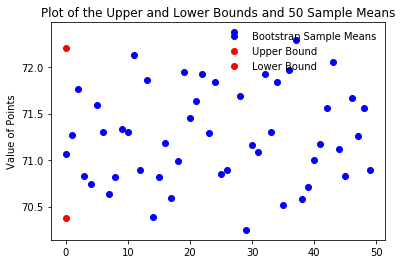

In [274]:
# 1000 sample bootstrap of original 15 samples

bootstrap_samples = random.choices(waiting_samples_15,k = 1000)
bootstrap_mean = np.mean(bootstrap_samples)
bootstrap_std_dev = np.std(bootstrap_samples)
#print(bootstrap_samples)

confidence_upper = bootstrap_mean + stats.t.ppf(1-0.025, df = 999) * bootstrap_std_dev / math.sqrt(1000)
confidence_lower = bootstrap_mean - stats.t.ppf(1-0.025, df = 999) * bootstrap_std_dev / math.sqrt(1000)
confidence_interval = confidence_upper - confidence_lower

print('The upper bound for' 
      ' 1000 bootstrap samples from 15 samples is ', str(confidence_upper))
print('The lower bound'
      ' for 1000 bootstrap samples from 15 samples is ', str(confidence_lower))
print("The interval width is ", str(confidence_interval))


sample_means = []
s = []
for i in range(0,50):
    s = random.choices(bootstrap_samples,k = 1000)
    s_m = sum(s)/len(s)
    #print(s_m)
    sample_means.append(s_m)
    

plt.plot(sample_means, "bo", label = 'Bootstrap Sample Means')
plt.plot(confidence_upper, "ro", label = 'Upper Bound')
plt.plot(confidence_lower, "ro", label = 'Lower Bound')
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Value of Points')
plt.title('Plot of the Upper and Lower Bounds and 50 Sample Means')

- Looking at the bootstrap confidence interval for 1000 samples, it is significantly lower than the confidence interval using only the original 15 samples. 
- The confidence interval width using bootstrapping is less than 2, while the interval width using only the fifteen samples is around 16. This bootstrapping method allows for much greater certainty in a much smaller range, resulting in more accurate measurements. 
- All but a few of the sample means recalculated from the bootstrapping method fall outside of the 95% confidence bound, which is empirical evidence for this bound being calculated correctly. 

The upper bound for all samples is  72.5097165699662
The lower bound  for all samples is  69.28440107709261
The interval width is  3.225315492873591


Text(0.5, 1.0, 'Upper and Lower Bounds and 100 Sample Means for all Data')

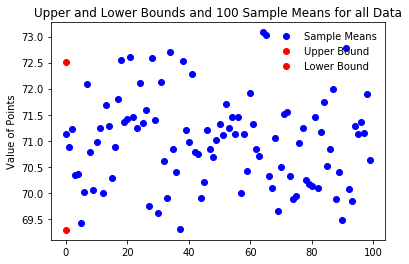

In [277]:
all_samples = df.iloc[:,1].values

all_mean = np.mean(all_samples)
all_std_dev = np.std(all_samples)

confidence_upper = all_mean + stats.norm.ppf(1-0.025) * all_std_dev / math.sqrt(272)
confidence_lower = all_mean - stats.norm.ppf(1-0.025) * all_std_dev / math.sqrt(272)
confidence_interval = confidence_upper - confidence_lower

print('The upper bound for' 
      ' all samples is ', str(confidence_upper))
print('The lower bound '
      ' for all samples is ', str(confidence_lower))
print("The interval width is ", str(confidence_interval))

sample_means = []
s = []
for i in range(0,100):
    s = random.choices(all_samples,k = 272)
    s_m = sum(s)/len(s)
    #print(s_m)
    sample_means.append(s_m)
    

plt.plot(sample_means, "bo", label = 'Sample Means')
plt.plot(confidence_upper, "ro", label = 'Upper Bound')
plt.plot(confidence_lower, "ro", label = 'Lower Bound')
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Value of Points')
plt.title('Upper and Lower Bounds and 100 Sample Means for' 
          ' all Data')

- Looking at the graph above, which plots the statistical 95% confidence interval using all the data, the interval width is much smaller than when only 15 samples of the data were used.
- Of the 100 resampled means from the total data, only a few fall outside the range of the confidence interval (the red points), which is empirical evidence for a properly calculated 95% confidence interval.

The upper bound for bootstrap samples is  71.89140283719402
The lower bound for bootstrap samples is  70.17859716280597
The interval width is  1.7128056743880506


Text(0.5, 1.0, 'Plot of the Upper and Lower Bounds and 50 Sample Means')

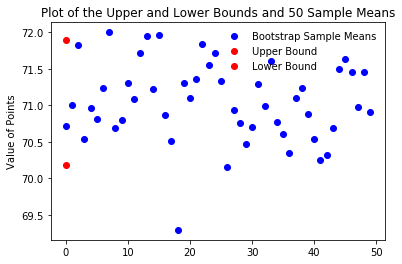

In [276]:
# 1000 sample bootstrap of all data

bootstrap_samples = random.choices(all_samples,k = 1000)
bootstrap_mean = np.mean(bootstrap_samples)
bootstrap_std_dev = np.std(bootstrap_samples)
#print(bootstrap_samples)

confidence_upper = bootstrap_mean + stats.norm.ppf(1-0.025) * bootstrap_std_dev / math.sqrt(1000)
confidence_lower = bootstrap_mean - stats.norm.ppf(1-0.025) * bootstrap_std_dev / math.sqrt(1000)
confidence_interval = confidence_upper - confidence_lower

print('The upper bound for' 
      ' bootstrap samples is ', str(confidence_upper))
print('The lower bound'
      ' for bootstrap samples is ', str(confidence_lower))
print("The interval width is ", str(confidence_interval))


sample_means = []
s = []
for i in range(0,50):
    s = random.choices(bootstrap_samples,k = 1000)
    s_m = sum(s)/len(s)
    #print(s_m)
    sample_means.append(s_m)
    

plt.plot(sample_means, "bo", label = 'Bootstrap Sample Means')
plt.plot(confidence_upper, "ro", label = 'Upper Bound')
plt.plot(confidence_lower, "ro", label = 'Lower Bound')
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Value of Points')
plt.title('Plot of the Upper and Lower Bounds and 50 Sample Means')

- Using the bootstrapping method for all the data points results in the lowest interval width of all the different graphs. 
- Here the interval width is around 1.7. This similar but still less than bootstrapping with only 15 samples, as opposed to 1000 samples from all the data in this case.
- From all this analysis, we can conclude that the more samples one has, the smaller the range of the 95% confidence interval. Bootstrapping with a high number of samples also results in a shrunken interval. 